In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from qutip import *
import tgates1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

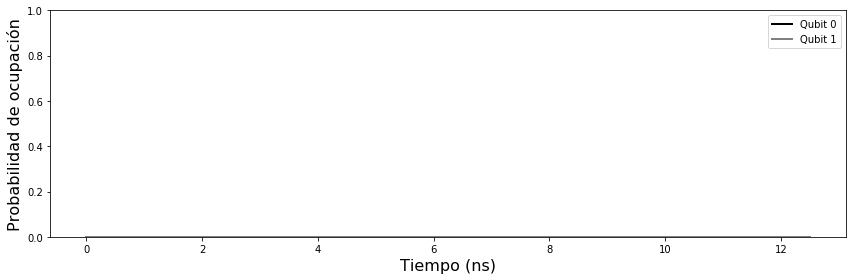

In [15]:
'''

psi0 = tensor(
    basis(2,0),
    basis(2,0),
    basis(2,0),
    (basis(2,0)+basis(2,1))/np.sqrt(2))
'''

qchip = tgates1.QuantumChip(wq = [5.0 * 2 * np.pi, 6.0 * 2 * np.pi],
                            g = [0.1 * 2*np.pi, 0.1 * 2*np.pi],
                            psi0 = [[1,0], [1,0]],
                            gamma = [0, 0], kappa = 0)
qchip.psi0 = tensor(basis(2,0),
                    basis(2,0))
qchip.sqrtiSWAP(0,1, plot_b=True)
qchip.psi0


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 2.60586253e-07+0.00000000e+00j
  0.00000000e+00+6.07185457e-07j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00-6.07185457e-07j
  9.99999739e-01+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]]

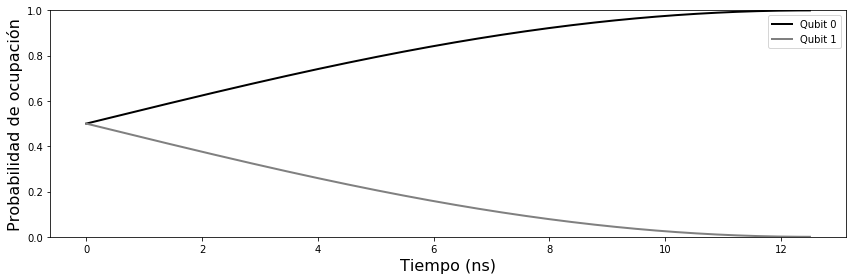

In [13]:
#qchip = tgates1.QuantumChip(wq = [5.0 * 2 * np.pi],
#                            g = [0.1 * 2*np.pi],
#                            psi0 = [[1,0]],
#                            gamma = [0], kappa = 0,
#                            resolution_E = 5000)
#qchip.psi0 = tensor(basis(2,0))
qchip.sqrtiSWAP(0, 1, plot_b=True)
qchip.psi0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.00000644e+00 -1.08202798e-06]
 [-1.08202798e-06 -6.44476377e-06]]

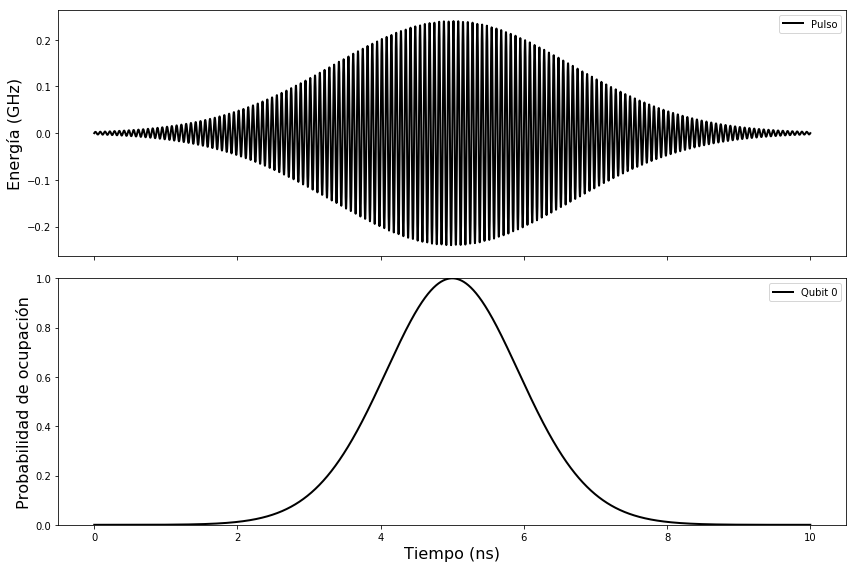

In [6]:
qchip = tgates1.QuantumChip(wq = [15.0 * 2 * np.pi],
                            g = [0.1 * 2*np.pi],
                            psi0 = [[1,0]],
                            gamma = [0], kappa = 0,
                            resolution_E = 5000)
qchip.psi0 = tensor(basis(2,0))
qchip.Ry(0, 2*np.pi, plot_b=True)
qchip.psi0

In [ ]:
qchip.iSWAP(0,1)
qchip.psi0

In [ ]:
qchip.Y(1)
qchip.psi0

In [ ]:
qchip.sqrtiSWAP(0,1)
qchip.psi0

In [ ]:
qchip.iSWAP(1,3)
qchip.psi0

In [ ]:
qsave(res,'displaced_system2')

In [ ]:
res = qload('displaced_system2')

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
plot_wigner(ptrace(res.states[-1],0), fig=fig, ax=ax, alpha_max=10)

In [ ]:
A=res.states[-1]
B=tensor(basis(2,1),basis(2,1),basis(2,1),basis(2,1))

In [ ]:
fidelity(A,B)

In [ ]:
A

# Testing suspicious gates

- CRy
- CP00
- CCRy
- CCCNOT
- CCCRy

In [ ]:
import tgates

In [ ]:
res = tgates.CRy(psi0, 2, 3, np.pi/4)
qsave(res, 'CRy1')
res.states[-1]

In [ ]:
res = tgates.CCRy(psi0, 1, 2, 3, np.pi/4)
qsave(res, 'CCRy1')
res.states[-1]

In [ ]:
res = tgates.CCCRy(psi0, 0, 1, 2, 3, np.pi/4)
qsave(res, 'CCCRy1')
res.states[-1]

In [ ]:
res = tgates.CP(psi0, 2, 3, np.pi/4, b=0b00)
qsave(res, 'CP001')
res.states[-1]

In [ ]:
res = tgates.CCCNOT(psi0, 0, 1, 2, 3)
qsave(res, 'CCCNOT1')
res.states[-1]

In [ ]:
# Section 2

In [ ]:
psi0 = tensor(
    basis(2,1),
    basis(2,1),
    basis(2,1),
    basis(2,0))
print('AHHHHHHHHHHHHHHHHHHHHHHHHHHHHH')

In [ ]:
res = tgates.CRy(psi0, 2, 3, np.pi/4)
qsave(res, 'CRy2')
res.states[-1]

In [ ]:
res = tgates.CCRy(psi0, 1, 2, 3, np.pi/4)
qsave(res, 'CCRy2')
res.states[-1]

In [ ]:
res = tgates.CCCRy(psi0, 0, 1, 2, 3, np.pi/4)
qsave(res, 'CCCRy2')
res.states[-1]

In [ ]:
res = tgates.CP(psi0, 2, 3, np.pi/4, b=0b00)
qsave(res, 'CP002')
res.states[-1]

In [ ]:
res = tgates.CCCNOT(psi0, 0, 1, 2, 3)
qsave(res, 'CCCNOT2')
res.states[-1]

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from qutip import *
import tgates
import time

def R2(psi0, c1, c2):                 # 1: black; 0: white; -1: none
    if c1 == -1 and c2 == -1:
        res = tgates.CNOT(psi0, 3, 2)
        res = tgates.X(res.states[-1], 3)

    elif c1 == -1:
        psi1 = psi0

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 1, 3, 2)
        res = tgates.CNOT(res.states[-1], 1, 3)
        psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    elif c2 == -1:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 0, 3, 2)
        res = tgates.CNOT(res.states[-1], 0, 3)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

    else:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCCNOT(psi1, 0, 1, 3, 2)
        res = tgates.CCNOT(res.states[-1], 0, 1, 3)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    return res

def L2(psi0, c1, c2):                 # 1: black; 0: white; -1: none
    if c1 == -1 and c2 == -1:
        res = tgates.X(psi0, 3)
        res = tgates.CNOT(res.states[-1], 3, 2)

    elif c1 == -1:
        psi1 = psi0

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CNOT(psi1, 1, 3)
        res = tgates.CCNOT(res.states[-1], 1, 3, 2)
        psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    elif c2 == -1:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        res = tgates.CNOT(psi1, 0, 3)
        res = tgates.CCNOT(res.states[-1], 0, 3, 2)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

    else:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 0, 1, 3)
        res = tgates.CCCNOT(res.states[-1], 0, 1, 3, 2)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    return res

def T1(psi0):
    res = L2(psi0, 0, 1)
    res = L2(res.states[-1], 1, 0)
    return L2(res.states[-1], 1, 0)

def T1d(psi0):
    res = R2(psi0, 1, 0)
    res = R2(res.states[-1], 1, 0)
    return R2(res.states[-1], 0, 1)

def Kb1(psi0):
    # theta target trigger_state
    # \[Theta]y00 -> 1.85806, \[Theta]y10 -> \ 2.48274, \[Theta]y11 -> 1.5708
    thetay00 = 1.85806
    thetay10 = 2.48274
    thetay11 = 1.5708

    res = tgates.X(psi0, 3)
    res = tgates.CRy(res.states[-1], 3, 2, thetay00)
    res = tgates.X(res.states[-1], 3)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CRy(res.states[-1], 2, 3, thetay10)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CRy(res.states[-1], 2, 3, thetay11)

    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay11)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay10)
    res = tgates.X(res.states[-1], 2)
    res = tgates.X(res.states[-1], 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, -thetay00)
    return tgates.X(res.states[-1], 3)

def Kb1d(psi0):
    thetay00 = 1.85806
    thetay10 = 2.48274
    thetay11 = 1.5708

    res = tgates.X(psi0, 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, thetay00)
    res = tgates.X(res.states[-1], 3)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay10)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay11)

    res = tgates.CRy(res.states[-1], 2, 3, -thetay11)
    res = tgates.X(res.states[-1], 2)
    res = tgates.CRy(res.states[-1], 2, 3, -thetay10)
    res = tgates.X(res.states[-1], 2)
    res = tgates.X(res.states[-1], 3)
    res = tgates.CRy(res.states[-1], 3, 2, -thetay00)
    return tgates.X(res.states[-1], 3)

def Kb2(psi0):
    res = tgates.CCRy(psi0, 0, 1, 2, np.pi/2)
    return tgates.CCRy(res.states[-1], 0, 1, 3, np.pi/2)

def Kb2d(psi0):
    res = tgates.CCRy(psi0, 0, 1, 3, -np.pi/2)
    return tgates.CCRy(res.states[-1], 0, 1, 2, -np.pi/2)

def Dd(psi0):
    return tgates.CP(psi0, 2, 3, np.pi, b=0b00)

def reg_SWAP(psi0):
    res = tgates.SWAP(psi0, 1, 3)
    return tgates.SWAP(res.states[-1], 0, 2)


In [11]:
#psi0 = tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0))
#res1 = tgates.H(psi0,0)
#res2 = tgates.H(res1.states[-1],1)
#res3 = Kb1(res2.states[-1])
#res4 = Kb2(res3.states[-1])
#res5 = Kb3(res4.states[-1])
res5 = T1d(res4.states[-1])

In [12]:
res5.states[-1]

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[-0.08116779+0.05496121j]
 [-0.23841917+0.15418497j]
 [-0.2424393 +0.15688349j]
 [-0.24084855+0.15221296j]
 [-0.23879113+0.15186015j]
 [-0.08090795+0.05641357j]
 [-0.23433334+0.15358404j]
 [-0.23840503+0.15642668j]
 [-0.22849758+0.15832319j]
 [-0.23307088+0.16124896j]
 [-0.08108199+0.05660628j]
 [-0.23460573+0.15489541j]
 [-0.20409452+0.14508181j]
 [-0.20611311+0.1438752j ]
 [-0.20415079+0.14263392j]
 [-0.20537649+0.13817183j]]

In [13]:
[np.abs(res5.states[-1][i]) for i in range(16)]

[array([[0.09802523]]),
 array([[0.28393082]]),
 array([[0.28877196]]),
 array([[0.28491544]]),
 array([[0.28298888]]),
 array([[0.0986336]]),
 array([[0.28017882]]),
 array([[0.28514254]]),
 array([[0.27798809]]),
 array([[0.28341359]]),
 array([[0.0988866]]),
 array([[0.28112708]]),
 array([[0.25040628]]),
 array([[0.25136167]]),
 array([[0.24904213]]),
 array([[0.24752971]])]

In [14]:
[np.angle(res5.states[-1][i]) for i in range(16)]

[array([[2.54638064]]),
 array([[2.56754288]]),
 array([[2.56725583]]),
 array([[2.57798533]]),
 array([[2.57515512]]),
 array([[2.53271053]]),
 array([[2.56142478]]),
 array([[2.56091435]]),
 array([[2.53565592]]),
 array([[2.53636072]]),
 array([[2.53211861]]),
 array([[2.55805449]]),
 array([[2.5236179]]),
 array([[2.53218333]]),
 array([[2.53176025]]),
 array([[2.54937423]])]